In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [23]:
train_df = pd.read_csv('../input/til2020/TIL_NLP_train_dataset.csv')
test_df = pd.read_csv('../input/til2020/TIL_NLP_test_dataset.csv')

In [7]:
train_df.sample(5)

,id,word_representation,outwear,top,trousers,women dresses,women skirts
3888,3888,w127737 w34893 w169083 w240417 w153315 w197783...,0,1,0,0,0
5880,5880,w378979 w41024 w389319 w186076 w392173 w141635...,0,1,0,0,0
849,849,w195317 w102200 w381413 w34893 w189175 w383444...,1,1,0,0,0
6066,6066,w195317 w374666 w194870 w388071 w82026 w126394...,0,1,1,0,0
2528,2528,w195317 w194130 w382355 w374393 w500013 w69002...,0,1,1,0,0


In [3]:
train_df.describe()

,id,outwear,top,trousers,women dresses,women skirts
count,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000,7380.000000
mean,3689.500000,0.446206,0.444580,0.556775,0.171409,0.167480
std,2130.566826,0.497131,0.496953,0.496800,0.376892,0.373429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1844.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3689.500000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,5534.250000,1.000000,1.000000,1.000000,0.000000,0.000000
max,7379.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
cols_target = ['outwear','top','trousers','women dresses','women skirts']

In [9]:
unlabelled_in_all = train_df[(train_df['outwear']!=1) & (train_df['top']!=1) & (train_df['trousers']!=1) & 
                            (train_df['women dresses']!=1) & (train_df['women skirts']!=1)]
print('Percentage of unlabelled statements is ', len(unlabelled_in_all)/len(train_df)*100)

Percentage of unlabelled statements is  0.0


In [10]:
# to see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())

Total rows in test is 2460
Total rows in train is 7380
outwear          3293
top              3281
trousers         4109
women dresses    1265
women skirts     1236
dtype: int64


In [12]:
# Look at the character length for the rows in the training data
train_df['char_length'] = train_df['word_representation'].apply(lambda x: len(str(x)))

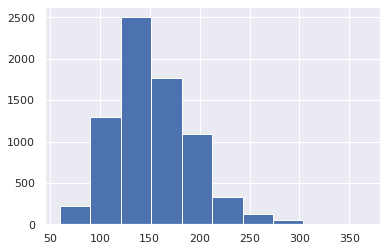

In [13]:
# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()

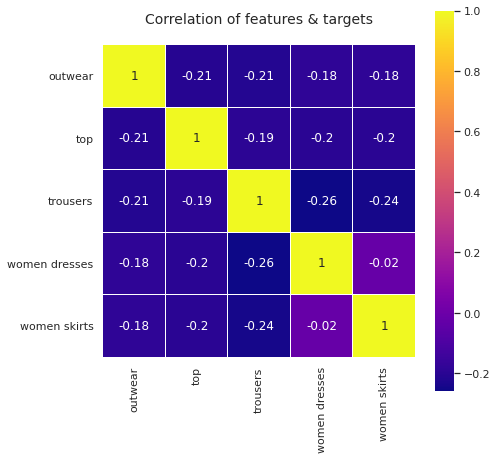

In [14]:
# examine the correlation between the different categories
data = train_df[cols_target]
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [16]:
# character length and distribution in the test data
test_df['char_length'] = test_df['word_representation'].apply(lambda x: len(str(x)))

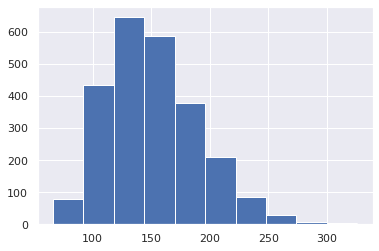

In [17]:
plt.figure()
plt.hist(test_df['char_length'])
plt.show()

In [18]:
train_df = train_df.drop('char_length',axis=1)